In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("Flight_Booking (1).csv")

In [ ]:
df.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df=df.drop(columns=['Unnamed: 0','stops','flight'])

In [ ]:
df.shape

(300153, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   arrival_time      300153 non-null  object 
 4   destination_city  300153 non-null  object 
 5   class             300153 non-null  object 
 6   duration          300153 non-null  float64
 7   days_left         300153 non-null  int64  
 8   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 20.6+ MB


In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df.isnull().sum()

airline             0
source_city         0
departure_time      0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(2218)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

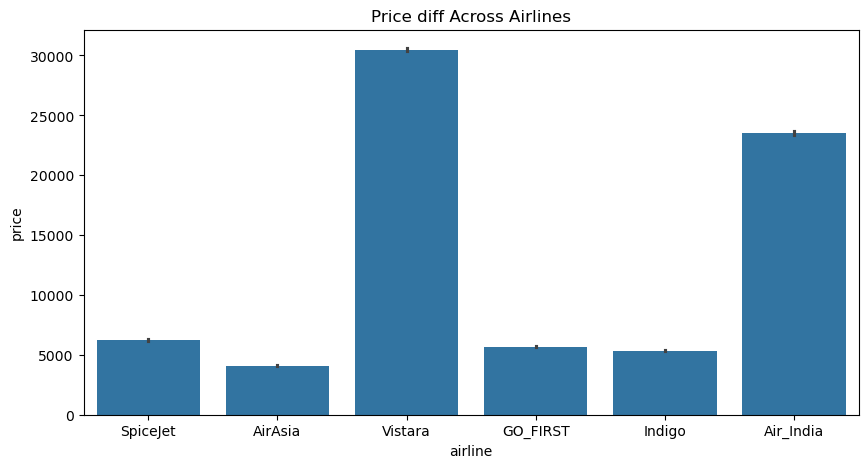

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x="airline", y="price", data=df)
plt.title("Price diff Across Airlines")
plt.show()


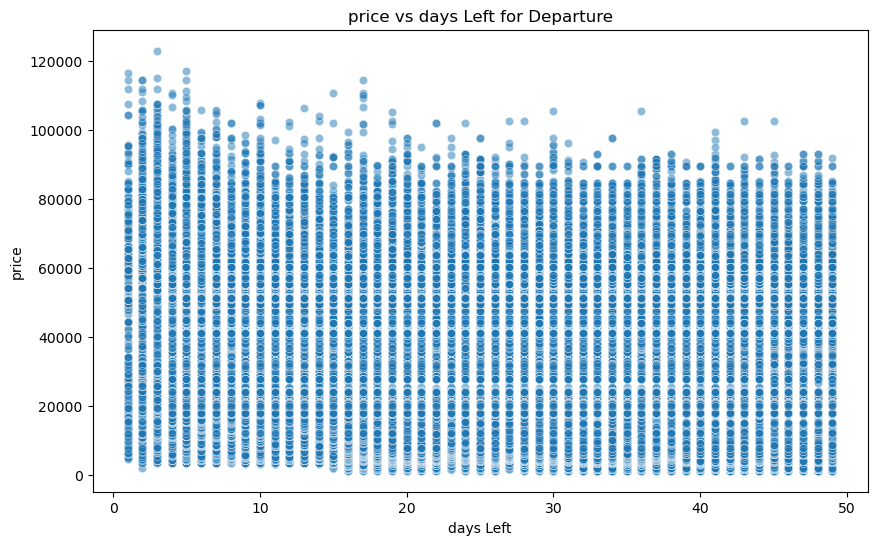

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="days_left", y="price", data=df, alpha=0.5)
plt.title("price vs days Left for Departure")
plt.xlabel("days Left")
plt.ylabel("price")
plt.show()

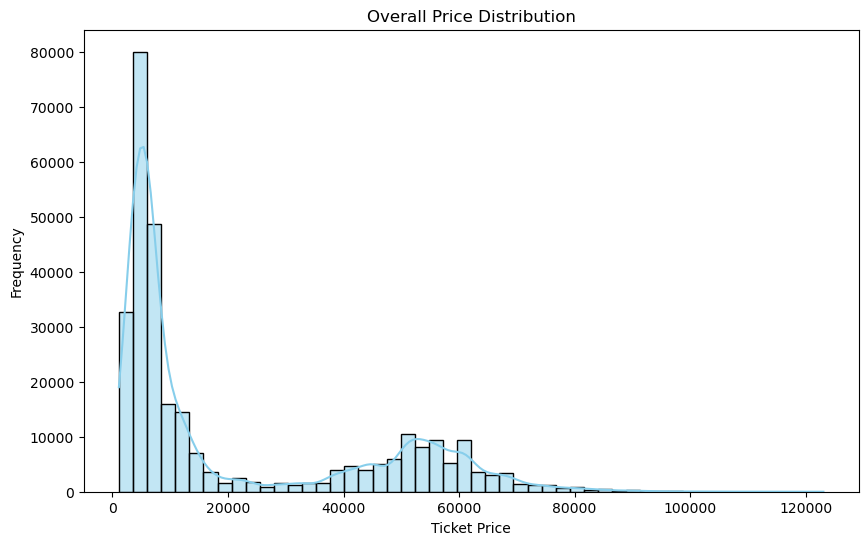

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df["price"], bins=50, kde=True, color="skyblue")
plt.title("Overall Price Distribution")
plt.xlabel("Ticket Price")
plt.ylabel("Frequency")
plt.show()

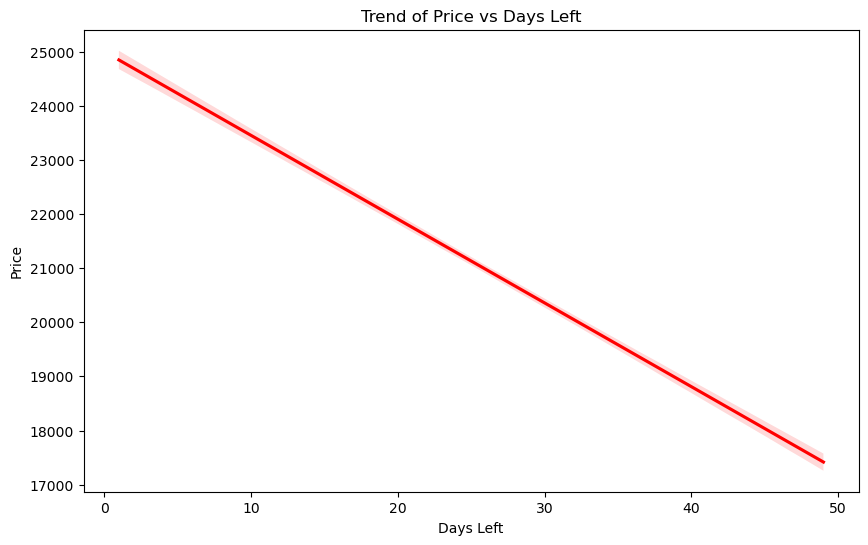

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="days_left", y="price", data=df, scatter=False, line_kws={"color":"red"})
plt.title("Trend of Price vs Days Left")
plt.xlabel("Days Left")
plt.ylabel("Price")
plt.show()


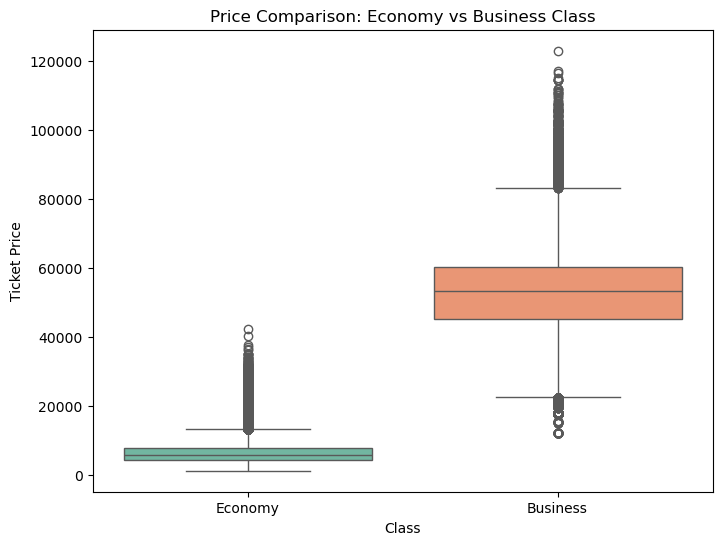

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x="class", y="price", data=df, palette="Set2")
plt.title("Price Comparison: Economy vs Business Class")
plt.xlabel("Class")
plt.ylabel("Ticket Price")
plt.show()


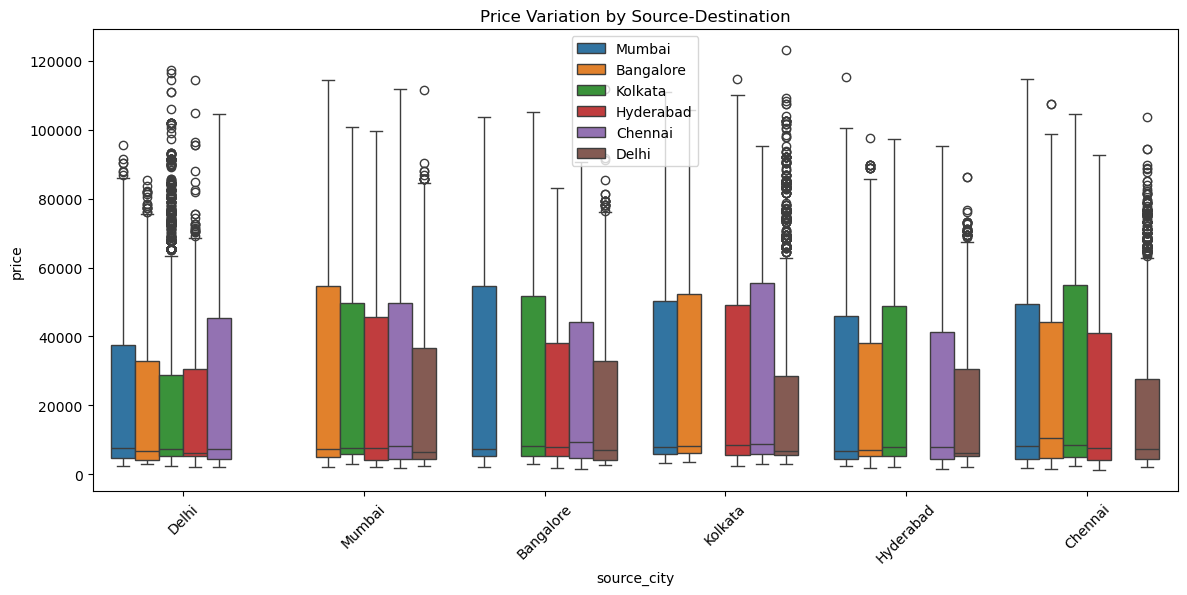

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x="source_city", y="price", hue="destination_city", data=df)
plt.xticks(rotation=45)
plt.title("Price Variation by Source-Destination")
plt.legend()
plt.show()


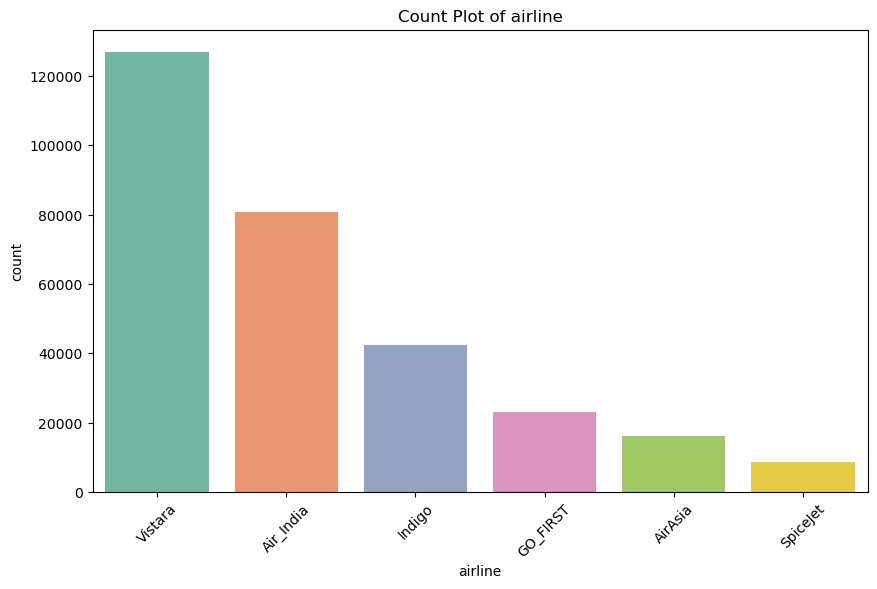

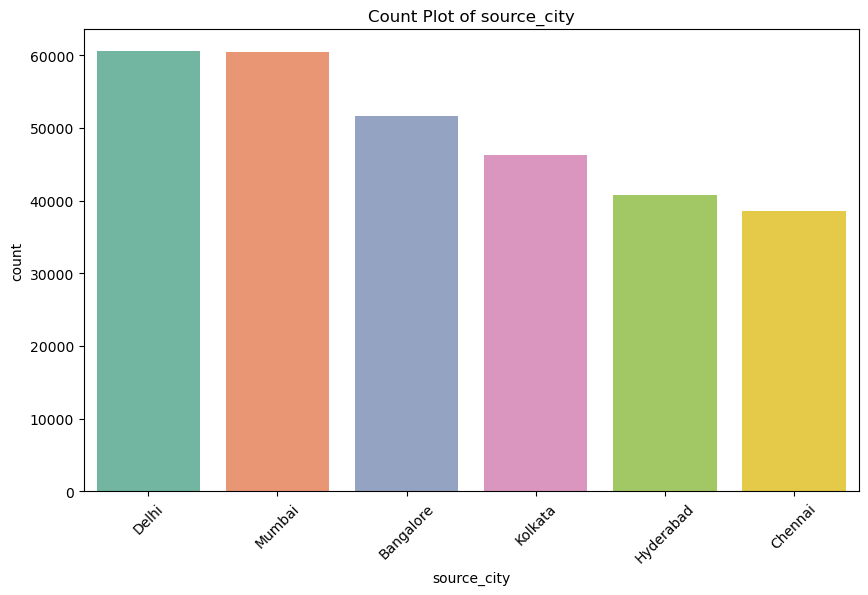

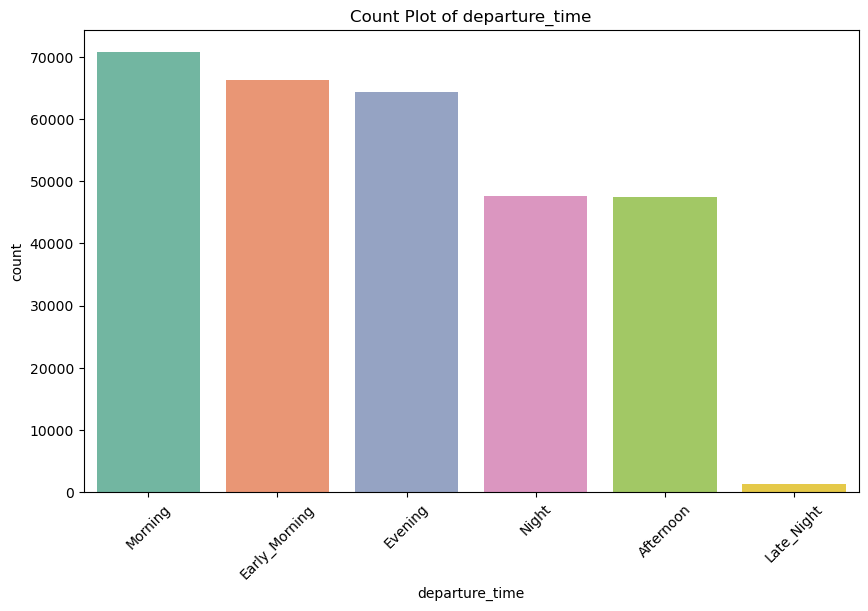

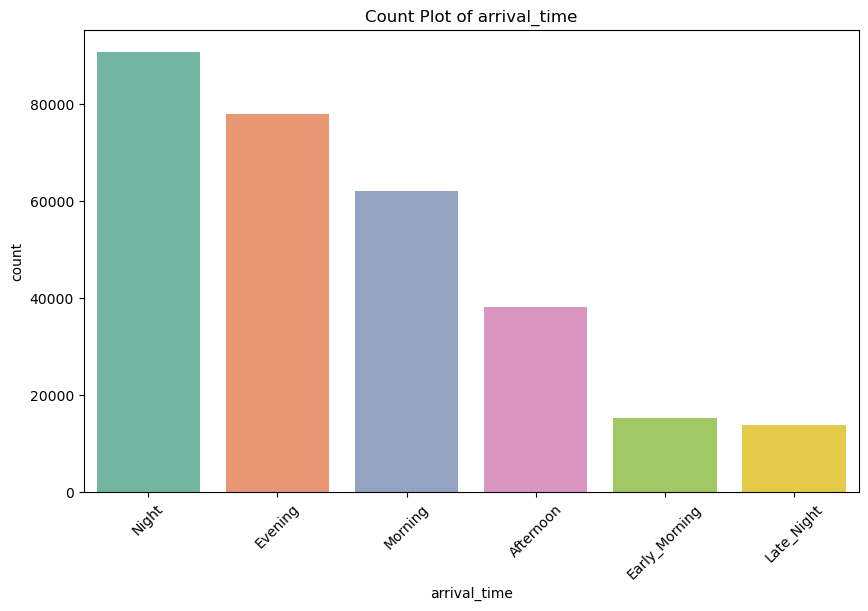

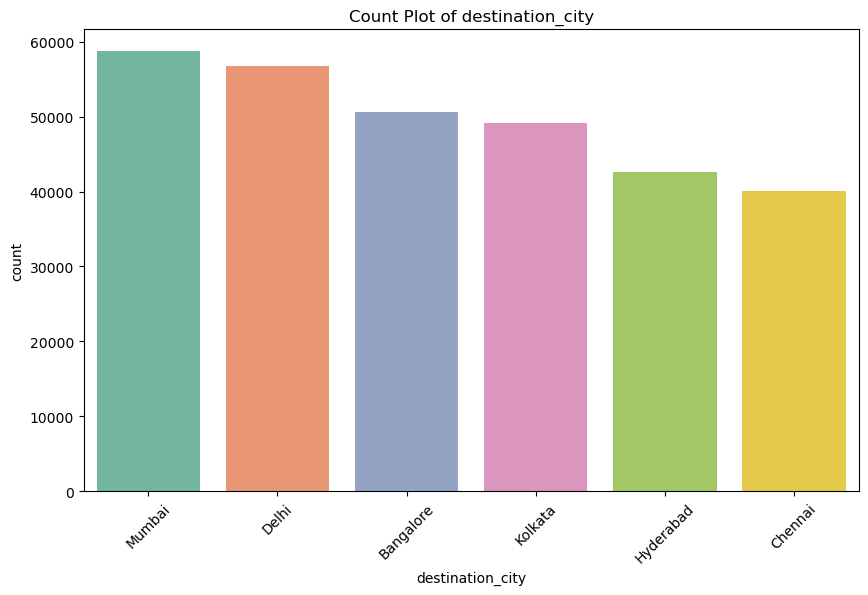

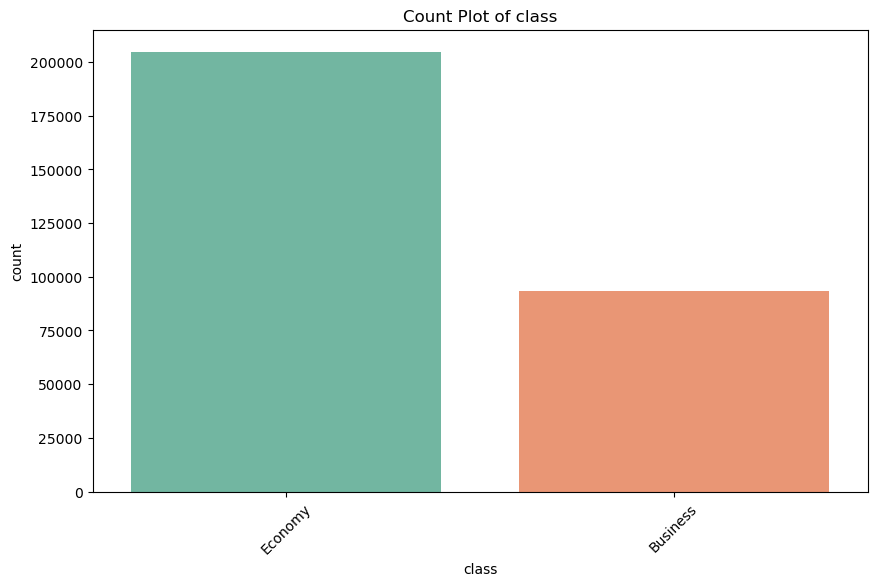

In [ ]:
for i in df.columns:
    if df[i].dtypes=='object':
        plt.figure(figsize=(10,6))
        sns.countplot(x=i, data=df, order=df[i].value_counts().index, palette="Set2")
        plt.title(f"Count Plot of {i}")
        plt.xticks(rotation=45)
        plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in df.columns:
    if df[i].dtypes=='object':
        le=LabelEncoder()
        df[i] = le.fit_transform(df[i])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297935 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           297935 non-null  int64  
 1   source_city       297935 non-null  int64  
 2   departure_time    297935 non-null  int64  
 3   arrival_time      297935 non-null  int64  
 4   destination_city  297935 non-null  int64  
 5   class             297935 non-null  int64  
 6   duration          297935 non-null  float64
 7   days_left         297935 non-null  int64  
 8   price             297935 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 22.7 MB


In [ ]:
df_corrr=df.corr()

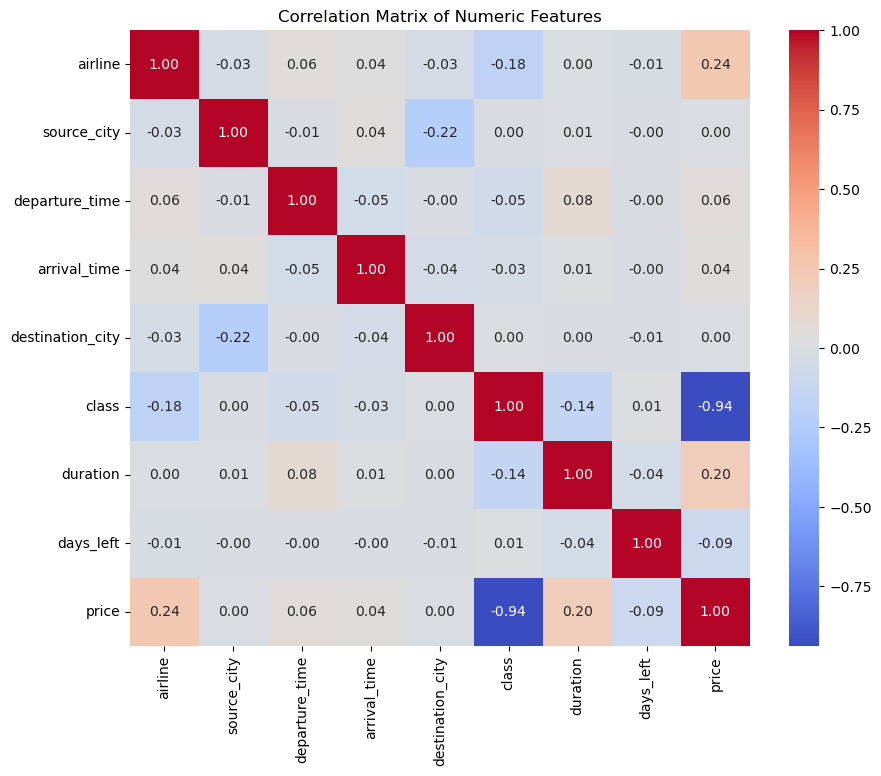

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corrr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
col_list=[]
for i in df.columns:
    if((df[i].dtypes!='object')&(i!='price')):
        col_list.append(i)
x=df[col_list]
vif_data=pd.DataFrame()
vif_data['columns_name']=x.columns
vif_data['vif_score']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_data

,columns_name,vif_score
0,airline,3.363574
1,source_city,2.897234
2,departure_time,2.747179
3,arrival_time,3.626689
4,destination_city,2.858986
5,class,2.767916
6,duration,3.462036
7,days_left,3.950053


In [ ]:
x= df.drop(columns=['price'])
y=df['price']

In [ ]:
x

,airline,source_city,departure_time,arrival_time,destination_city,class,duration,days_left
0,4,2,2,5,5,1,2.17,1
1,4,2,1,4,5,1,2.33,1
2,0,2,1,1,5,1,2.17,1
3,5,2,4,0,5,1,2.25,1
4,5,2,4,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...
300148,5,1,4,2,3,0,10.08,49
300149,5,1,0,5,3,0,10.42,49
300150,5,1,1,5,3,0,13.83,49
300151,5,1,1,2,3,0,10.00,49


In [ ]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 297935, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.60,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)*100

89.81445261230373

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
rmse

np.float64(7255.438783825709)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
mae

4485.102554372657

In [ ]:
r2_lr = r2_score(y_test, y_pred)*100

In [ ]:
r2_lr

0.8981445261230373

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model=DecisionTreeRegressor()

In [ ]:
dt_model.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [ ]:
pred=dt_model.predict(x_test)

In [ ]:
rmse_dt = np.sqrt(mean_squared_error(y_test, pred))
mae_dt = mean_absolute_error(y_test, pred)

In [ ]:
rmse_dt

np.float64(3794.842180975065)

In [ ]:
mae_dt

1359.6243168252583

In [ ]:
r2_dt = r2_score(y_test, pred)*100
r2_dt

97.21359367169434

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model=RandomForestRegressor()

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
pred_rf = rf_model.predict(x_test)


In [ ]:
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
mae_rf = mean_absolute_error(y_test, pred_rf)


In [ ]:
rmse_rf

np.float64(2914.4925182338266)

In [ ]:
mae_rf

1255.3732787377364

In [ ]:
r2_rf = r2_score(y_test,pred_rf)*100

In [ ]:
r2_rf

98.35645008280456

In [ ]:
results = pd.DataFrame({"Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "RMSE": [rmse, rmse_dt, rmse_rf],
    "MAE": [mae, mae_dt, mae_rf],
    "R²": [r2_lr, r2_dt, r2_rf]})


NameError: name 'rmse_lr' is not defined